In [1]:
import pandas as pd
import seaborn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("PoliticianDonationProfile.csv")
df.head()

,CID,Party,0 to 580.49,580.49 to 1526.17,1526.17 to 4012.47,4012.47 to 10549.24,over 10549.24
0,N00028958,R,5.01,54.39,34.65,5.94,0.00
1,N00027860,D,5.57,60.23,26.58,7.62,0.00
2,N00031681,R,6.79,49.32,35.24,8.65,0.00
3,N00035825,D,7.87,32.44,31.54,26.99,1.15
4,N00027509,R,3.09,59.98,31.81,5.12,0.00


## Selecting a k value
We'd like to cluster our data to view voting behavior in aggreate. We want enough clusters to effectively capture distinct groups, while still allowing us to have substantial clusters.

[72, 274]
[65, 115, 166]
[7, 59, 118, 162]
[7, 22, 42, 134, 141]
[7, 17, 42, 65, 92, 123]
[1, 10, 18, 34, 61, 93, 129]
[1, 12, 17, 36, 37, 59, 86, 98]
[1, 6, 12, 14, 34, 37, 58, 86, 98]
[1, 6, 12, 15, 17, 20, 37, 55, 86, 97]
[1, 6, 8, 17, 19, 20, 37, 40, 50, 70, 78]
[1, 6, 6, 13, 13, 16, 18, 28, 33, 62, 67, 83]
[1, 6, 6, 7, 11, 15, 23, 25, 34, 35, 54, 60, 69]
[1, 4, 6, 11, 14, 14, 17, 24, 26, 28, 30, 43, 58, 70]
[1, 4, 6, 9, 12, 12, 13, 15, 15, 21, 30, 38, 55, 56, 59]
[1, 3, 4, 6, 6, 7, 9, 10, 15, 15, 29, 36, 38, 50, 53, 64]
[1, 4, 6, 6, 7, 9, 9, 10, 14, 15, 25, 29, 31, 34, 38, 49, 59]
[1, 2, 4, 5, 6, 8, 8, 9, 10, 12, 16, 22, 26, 26, 37, 39, 57, 58]
[1, 3, 3, 4, 6, 6, 10, 10, 11, 14, 15, 17, 20, 21, 32, 33, 42, 48, 50]


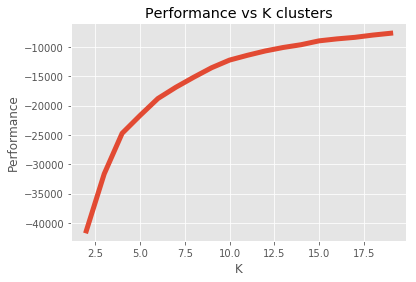

[None, None, 72.0, 65.0, 7.0, 7.0, 7.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


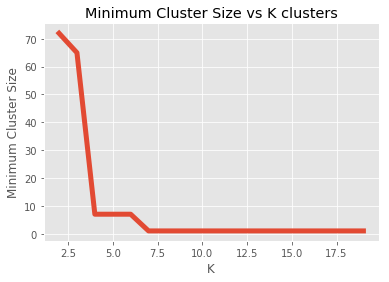

In [3]:
performance = [None, None]
min_cluster_size = [None, None]
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(df[df.columns[2:]])
    unique_label, counts = np.unique(labels, return_counts=True)
    #print(counts)
    print(sorted(counts))
    min_cluster_size.append(np.mean(sorted(counts)[0]))
    performance.append(kmeans.score(df[df.columns[2:]]))
plt.style.use("ggplot")
plt.plot(performance, lw=5)
plt.title("Performance vs K clusters")
plt.ylabel("Performance")
plt.xlabel("K")
plt.show()
print(min_cluster_size)
plt.plot(min_cluster_size, lw=5)
plt.title("Minimum Cluster Size vs K clusters")
plt.ylabel("Minimum Cluster Size")
plt.xlabel("K")
plt.show()

## Selecting a K value (cont)
So we see performance rising quickly as we add the first few clusters; but we also see as we get past 7 clusters, the smallest cluster size is 1. This basically means at that point we're overfitting our clusters, and it's nonsensical to compare the voting record of a single politician with that of another if our goal is to see overarching trends. In fact, we really don't get consistent substantial clusters thorughout at any value beyond 3--so this will be our selected K value.

In [3]:
kmeans = KMeans(n_clusters=3)
df['ClusterID'] = kmeans.fit_predict(df[df.columns[2:]])
df2 = df[['CID', 'ClusterID']]

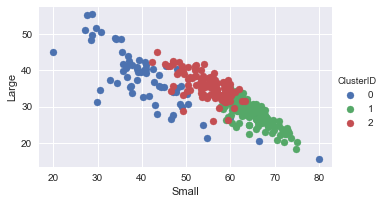

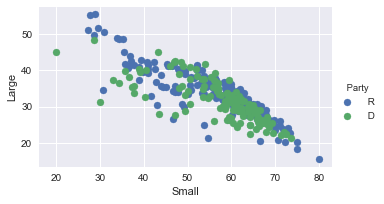

In [4]:
clusts = [0,1,2]
parts = ["R","D"]
df["Small"] = df[" 0 to 580.49"] + df[" 580.49 to 1526.17"]
df["Large"] = df[" 1526.17 to 4012.47"] + df[" over 10549.24"]
fg = seaborn.FacetGrid(data=df, hue='ClusterID', hue_order=clusts, aspect=1.61)
fg.map(plt.scatter, 'Small', 'Large').add_legend()
fg = seaborn.FacetGrid(data=df, hue=' Party', aspect=1.61)
fg.map(plt.scatter, 'Small', 'Large',).add_legend()
plt.show()

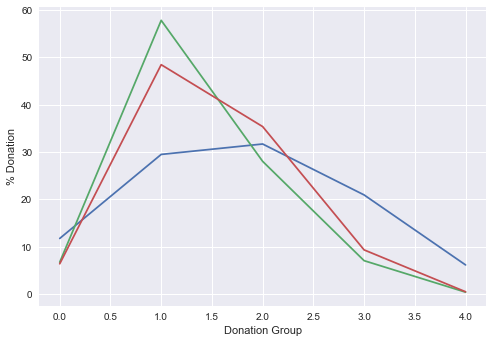

In [5]:
clusters = []
for i in range(3):
    clusters.append([])
    clusters[i].append(np.mean((df.loc[df["ClusterID"] == i])[" 0 to 580.49"]))
    clusters[i].append(np.mean((df.loc[df["ClusterID"] == i])[" 580.49 to 1526.17"]))
    clusters[i].append(np.mean((df.loc[df["ClusterID"] == i])[" 1526.17 to 4012.47"]))
    clusters[i].append(np.mean((df.loc[df["ClusterID"] == i])[" 4012.47 to 10549.24"]))
    clusters[i].append(np.mean((df.loc[df["ClusterID"] == i])[" over 10549.24"]))
plt.plot(clusters[0])
plt.plot(clusters[1])
plt.plot(clusters[2])
plt.xlabel("Donation Group")
plt.ylabel("% Donation")
plt.show()

In [6]:
bill_votes_data = pd.read_csv("./14Cycle/billVotes.csv",na_values="?")
bill_votes_data.dropna(inplace=True)

In [7]:
bill_votes_data.loc[bill_votes_data["voteNumber"] == 3]

,personID,vote,party,CID,voteNumber
0,400004,0,R,N00003028,3
1,400018,0,R,N00005656,3
2,400021,1,D,N00009774,3
3,400029,2,R,N00025292,3
5,400032,0,R,N00003105,3
6,400033,1,D,N00007727,3
7,400046,0,R,N00005883,3
8,400047,1,D,N00001619,3
9,400048,1,D,N00002713,3
10,400052,0,R,N00025219,3


In [14]:
for i in range(3):
    r = len(df[(df['ClusterID'] == i) & (df[' Party'] == ' R')])
    t = len(df[df['ClusterID'] == i])
    print(r/t)

0.6818181818181818
0.5308641975308642
0.6186440677966102


In [13]:
print(df[' Party'][0])

 R
